<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Dip-Lab/blob/main/lab_12_dip_zia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

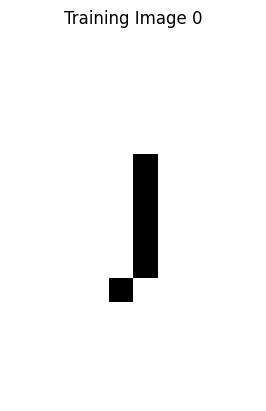

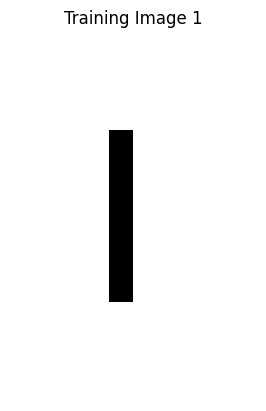

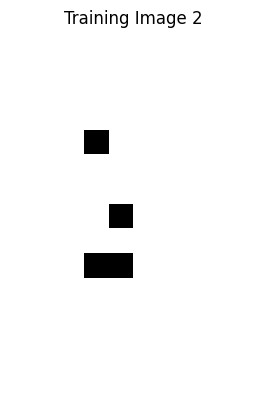

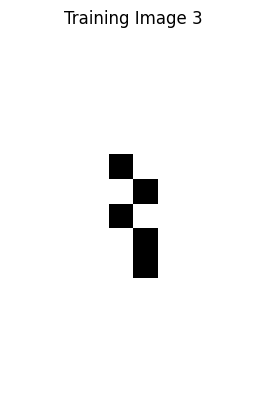

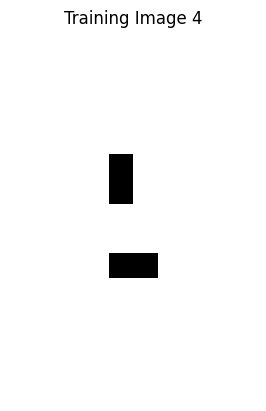

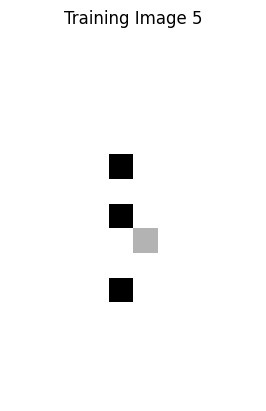

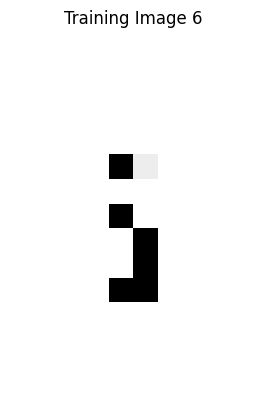

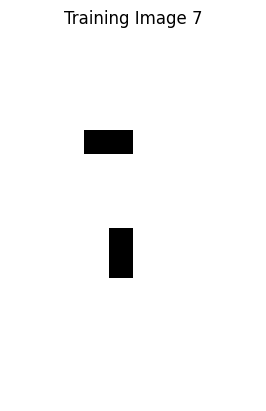

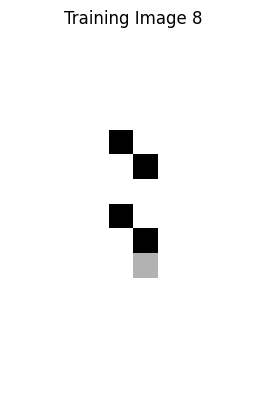

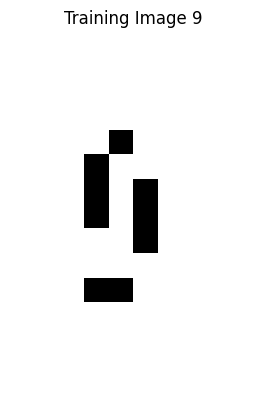

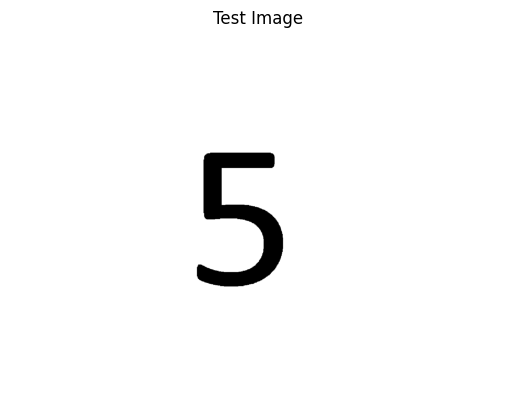

KNN Prediction: 5
Template Matching Prediction: 5


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def load_dataset(image_paths, labels):
    features, target = [], []
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (10, 15))
        features.append(img_resized.flatten())
        target.append(label)
    return np.array(features), np.array(target)

def template_matching(test_image, templates):
    best_match, best_score = None, float('inf')
    for label, template in templates.items():
        diff = np.sum((test_image - template) ** 2)
        if diff < best_score:
            best_score, best_match = diff, label
    return best_match

def display_image(image, title="Image"):
    """Helper function to display images."""
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image_paths = [
    "/content/0.png",
    "/content/1.png",
    "/content/2.png",
    "/content/3.png",
    "/content/4.png",
    "/content/5.png",
    "/content/6.png",
    "/content/7.png",
    "/content/8.png",
    "/content/9.png",
]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

features, target = load_dataset(image_paths, labels)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features, target)

for img_path, label in zip(image_paths, labels):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (10, 15))
    display_image(img_resized, title=f"Training Image {label}")

test_image_path = "/content/test.png"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

display_image(test_image, title="Test Image")

test_image_resized = cv2.resize(test_image, (10, 15)).flatten().reshape(1, -1)
knn_prediction = knn.predict(test_image_resized)[0]
print(f"KNN Prediction: {knn_prediction}")

templates = {}
for label in set(labels):
    templates[label] = features[target == label].mean(axis=0).reshape(15, 10)

test_image_resized_2d = test_image_resized.reshape(15, 10)
template_prediction = template_matching(test_image_resized_2d, templates)
print(f"Template Matching Prediction: {template_prediction}")
